# ISYE6748 project <br> evaluate correction from voice_labels



## Why do this?

We want to confirm the base assumption that all specialists have high correlation amoung each other. We will use the data from voice_labels to run the analysis. 
<br><br>

<div>
There are 3 possible correlations that we can do:
    <ul>
  <li>per emotion (average results for all specialists)</li>
  <li>per specialist(average results for all emotions)</li>
  <li>per emotion-specialist</li>
</ul>  
</div>

We will focus on the **emotion-specialist** pair here.

<div class="alert alert-block alert-danger">
    Do not connect to the mongoDB as a read/write user and never run the command drop `collection.drop()`
</div>


All instructions, code comments, etc. in this notebook **are only a recommendation**. That is, feel free to do your own analysis with the data.  


#### Imports
<span style="color:red">*Please don't modify the below cell*</span>

In [1]:
# import pymongo
# from pymongo import MongoClient
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [20]:
# font
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.size'] = 20
plt.rcParams['axes.linewidth'] = 1

#### load json file

In [3]:
data = json.loads(open('voice_labels.json', "r").read())

#### create support arrays (unique values)

In [4]:
filename = []
for x in data:
    filename.append(x)

In [5]:
specname = []
for x in data:
    for y in data[x]:
        specname.append(y)
        
specname_res = []
[specname_res.append(x) for x in specname if x not in specname_res]
specname_res

['Pegah Moghaddam', 'Yared Alemu', 'Michelle Lyn', 'Sedara Burson']

In [6]:
emotionname = []
for x in data:
    for y in data[x]:
        for z in data[x][y]:
            emotionname.append(z)
            
emotionname_res = []
[emotionname_res.append(x) for x in emotionname if x not in emotionname_res]
emotionname_res

['fear', 'anger', 'happy', 'neutral', 'sadness']

In [7]:
valsname = []
for x in data:
    for y in data[x]:
        for z in data[x][y]:
            valsname.append(data[x][y][z])
            
valsname_res = []
[valsname_res.append(x) for x in valsname if x not in valsname_res]
valsname_res

['high', 'medium', 'none', 'low']

#### data extract

In [8]:
results = pd.DataFrame(data = filename, columns=['file'])

for emotion_val in np.arange(len(emotionname_res)):
    for specialist_val in np.arange(len(specname_res)):
    
    # emotion_val = 0
    #     specialist_val = 0

        mycolname = emotionname[emotion_val] +"-"+ "T"+str(specialist_val+1)
#         mycolname = emotionname[emotion_val] +"-"+ str(specialist_val)
        
        data_extract = pd.DataFrame(columns=['file', mycolname])

        for i in np.arange(len(filename)):
            #     i = 0

            try:
                val = data[filename[i]][specname_res[specialist_val]][emotionname[emotion_val]]
                dictmap = {'high': 3, 'medium': 2 , 'low':1 , 'none':0}
                for word, replacement in dictmap.items():
                    val = val.replace(word, str(replacement))*1
            except:
                val = None


            data_extract = data_extract.append({
                'file':filename[i],
                mycolname: val
                }, ignore_index = True)

        results = pd.concat([results,data_extract[mycolname]],axis=1)

In [9]:
# results

#### clean results (remove na)

In [10]:
results_clean = results.dropna().iloc[:,1:].astype(int)
# results_clean

#### correlation check

In [11]:
matrix = results_clean.corr()

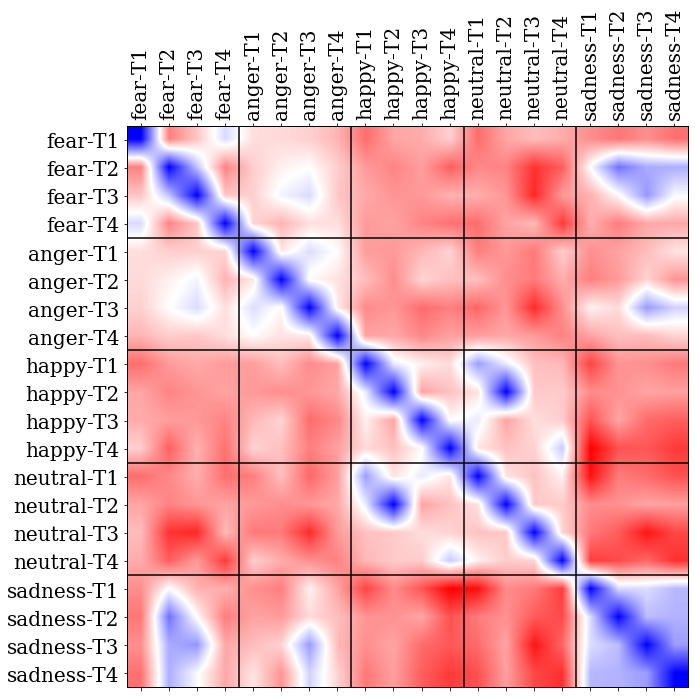

In [43]:
fig, ax = plt.subplots(ncols=1, nrows=1, sharex=True)
fig.set_size_inches(12, 12)

# fig, ax = plt.subplots(figsize=(10,10))

alpha = list(results_clean.columns.values.tolist())
ax.matshow(matrix, cmap='bwr_r',interpolation='bilinear')

ax.axhline(y=3.5 , color='k')
ax.axhline(y=7.5 , color='k')
ax.axhline(y=11.5 , color='k')
ax.axhline(y=15.5 , color='k')

ax.axvline(x=3.5 , color='k')
ax.axvline(x=7.5 , color='k')
ax.axvline(x=11.5 , color='k')
ax.axvline(x=15.5 , color='k')

# ax.set_xticklabels(['']+alpha)
# ax.set_yticklabels(['']+alpha)

xaxis = np.arange(len(alpha))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(alpha)
ax.set_yticklabels(alpha)

plt.setp([tick.label2 for tick in ax.xaxis.get_major_ticks()], rotation=90,
         ha="left", va="center",rotation_mode="anchor")

plt.subplots_adjust(left=0.25,top=0.85)
# plt.savefig('.\img\correlation.png', format='png',transparent=True, dpi=300)
plt.show()